## Benchmark: Sentimental Analysis

In [2]:
from sentimental_hwglu.naive_sa import NaiveSA
from sentimental_hwglu.utils import loadIMDBdataset, tokenizer_porter
from sentimental_hwglu.words_statistics import WordStatistics
from sklearn.feature_extraction.text import CountVectorizer

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import time
import re


In [2]:
df = loadIMDBdataset(filename='/data/data/datasets/aclImdb_vclean.csv')

In [16]:
file_pos = '/data/data/list_nagative_words.txt'
x_pos = []
y_pos = []
with open(file_pos) as f:
    for l in f:
        k, v = l.split(":")
        k = k.strip()
        v = float(v.strip().replace("%", ""))
        x_pos.append(k)
        y_pos.append(v)
values = [(x, y) for y, x in sorted(zip(y_pos, x_pos))]
file_pos = '/data/zibaldone/projects/ai/betchelorZhanna/python/data/list_nagative_words_sorted.txt'
with open(file_pos, 'w+') as f:
    for x, y, in values:
        f.write(x + ':' + str(y) + '\n')

file_pos = '/data/zibaldone/projects/ai/betchelorZhanna/python/data/list_positive_words.txt'
x_pos = []
y_pos = []
with open(file_pos) as f:
    for l in f:
        k, v = l.split(":")
        k = k.strip()
        v = float(v.strip().replace("%", ""))
        x_pos.append(k)
        y_pos.append(v)
values = [(x, y) for y, x in sorted(zip(y_pos, x_pos))]
file_pos = '/data/zibaldone/projects/ai/betchelorZhanna/python/data/list_positive_words_sorted.txt'
with open(file_pos, 'w+') as f:
    for x, y, in values:
        f.write(x + ':' + str(y) + '\n')

In [29]:
def getHist(filename):
    x = []
    y = []
    with open(filename) as f:
        for l in f:
            k, v = l.split(":")
            k = k.strip()
            v = float(v.strip().replace("%", ""))
            x.append(k)
            y.append(v)
    return x, y

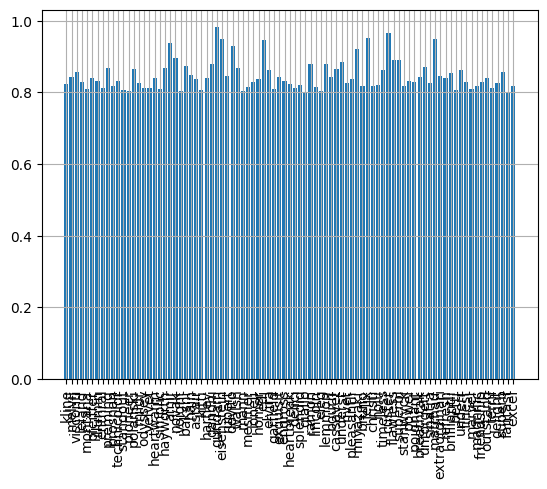

In [30]:
plt.xticks(rotation=90)
plt.bar(x_pos, y_pos)
plt.grid()

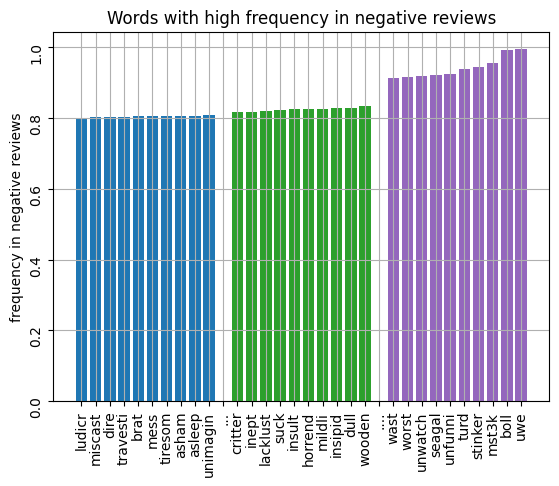

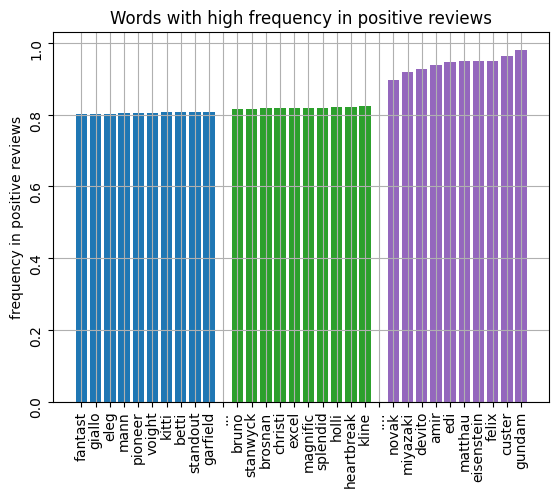

In [38]:
files = [
    ('Words with high frequency in negative reviews', 'frequency in negative reviews', '/data/zibaldone/projects/ai/betchelorZhanna/python/data/list_nagative_words_sorted.txt'),
    ('Words with high frequency in positive reviews', 'frequency in positive reviews', '/data/zibaldone/projects/ai/betchelorZhanna/python/data/list_positive_words_sorted.txt'),
]
for t, y_label, f in files:
    fig, axs = plt.subplots()
    axs.set_title(t)
    axs.set_ylabel(y_label)
    x, y = getHist(f)
    axs.tick_params(labelrotation=90)
    axs.bar(x[:10], y[0:10]); 
    axs.bar(["..."], [0])
    axs.bar(x[20:30], y[20:30]); 
    axs.bar(["...."], [0])
    axs.bar(x[-10:], y[-10:])
    axs.grid()
